In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [16]:
heart_data=pd.read_csv("heart_failure_clinical_records_dataset (1).csv")

In [17]:
heart_data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [18]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [19]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Visualization

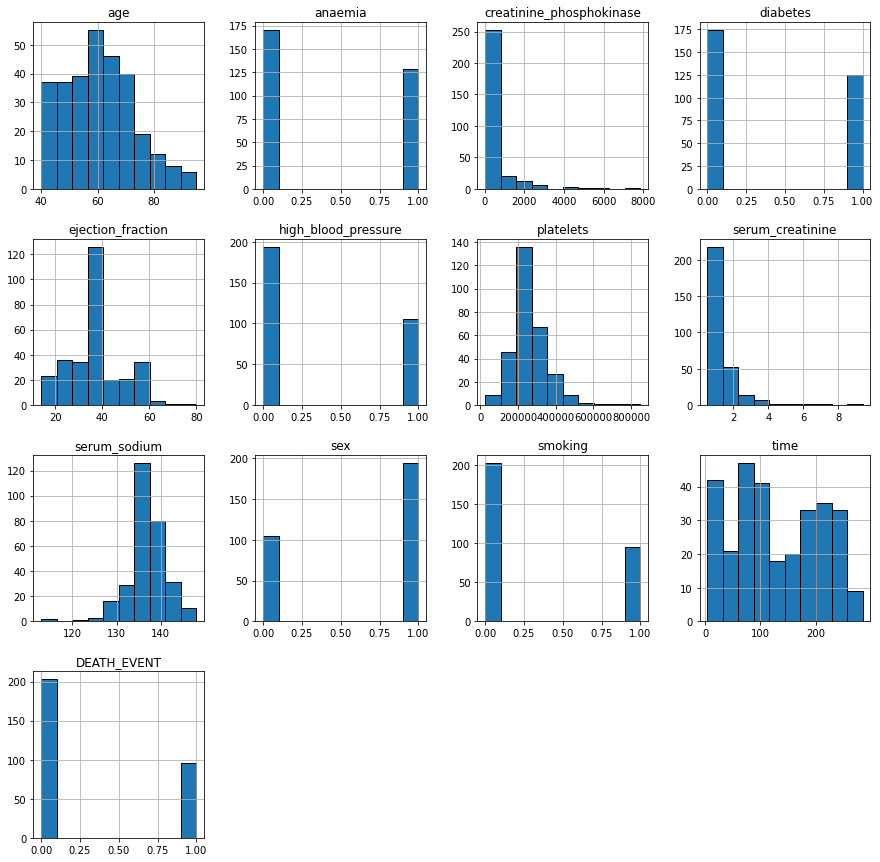

In [20]:
heart_data.hist(figsize=(15,15),edgecolor='black');

In [21]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# pie charts

In [22]:

import plotly.graph_objs as go
labels = ['No Diabetes','Diabetes']
diabetes_yes = heart_data[heart_data['diabetes']==1]
diabetes_no = heart_data[heart_data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

In [24]:
import plotly.express as px
fig=px.pie(heart_data,values='diabetes',names='DEATH_EVENT',title='Death Analysis')
fig.show()

# Gender Vs DEATH_EVENT

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["sex"]==1)]
d2 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["sex"]==1)]
d3 = heart_data[(heart_data["DEATH_EVENT"]==0) & (heart_data["sex"]==0)]
d4 = heart_data[(heart_data["DEATH_EVENT"]==1) & (heart_data["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]

values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="pink")

fig.show()


# Age VS Death_count

In [27]:
import plotly.express as px
fig = px.histogram(heart_data, x="age", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

# Heat Map

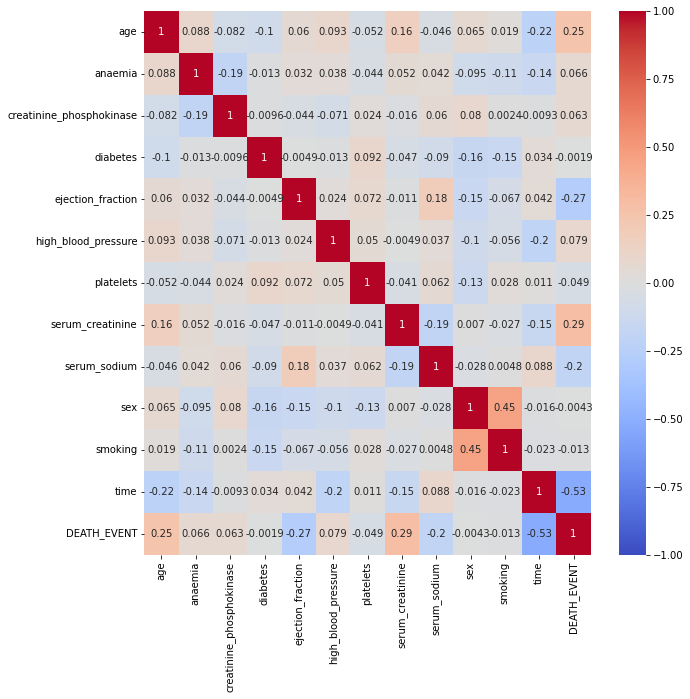

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(),vmin=-1,cmap='coolwarm',annot=True);


# DATA ANALYSIS

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

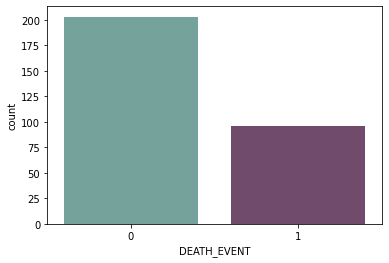

In [27]:
cols= ["#6daa9f","#774571"]
sns.countplot(x= heart_data["DEATH_EVENT"], palette= cols)

# Data Modeling

# Algorithm:Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [15]:
Feature=['time','ejection_fraction','serum_creatinine']
x=heart_data[Feature]
y=heart_data["DEATH_EVENT"]

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_re=LogisticRegression()

In [19]:
log_re.fit(xtrain,ytrain)
log_re_pred=log_re.predict(xtest)

In [20]:
log_re.fit(xtrain,ytrain)
log_re_pred=log_re.predict(xtest)

Logistic Accuracy Score:  90.00%


In [21]:
%pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix

Note: you may need to restart the kernel to use updated packages.


<Figure size 432x288 with 0 Axes>

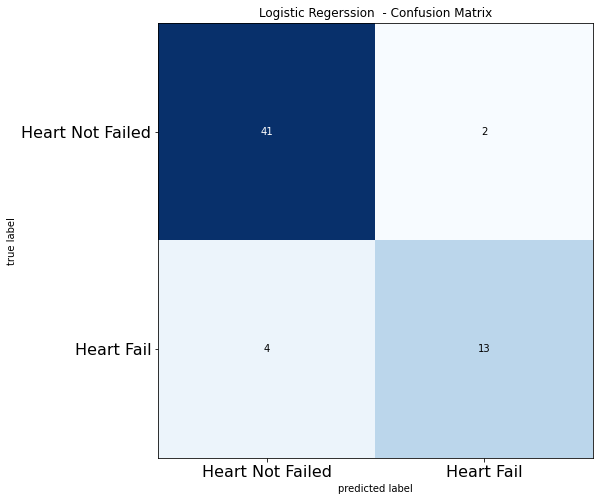

In [22]:

cm = confusion_matrix(ytest, log_re_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regerssion  - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# preprocessing

In [24]:
X=heart_data.drop(["DEATH_EVENT"],axis=1)
y=heart_data["DEATH_EVENT"]

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


# seaborn

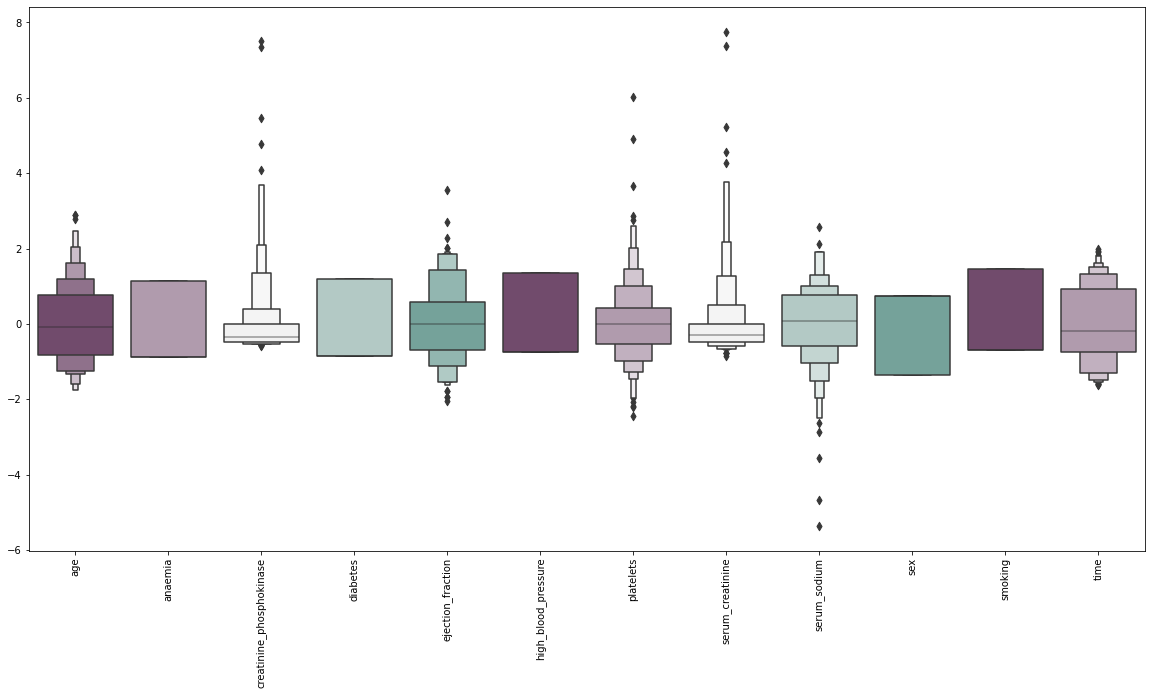

In [26]:
import seaborn as sns
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

# Train/Test Split & Normalization

In [29]:
x = heart_data.drop("DEATH_EVENT", axis = 1)
y = heart_data['DEATH_EVENT']

In [30]:
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.3)
print(y_train.value_counts())

0    142
1     67
Name: DEATH_EVENT, dtype: int64


In [32]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
col = ["anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"]

x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

# Decision Tree Classifier

Decision Tree Classifier Top 5 Success Rates:
[83.33, 83.33, 83.33, 82.22, 82.22]


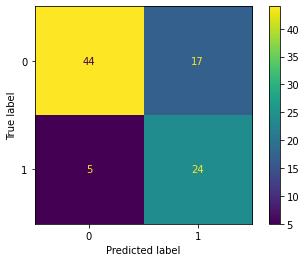

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

# K Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(x_train, y_train)

y_test_pred_KNN = KNN.predict(x_test)
y_train_pred_KNN = KNN.predict(x_train)

test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN)
train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN)
scores_KNN = cross_val_score(KNN, x_train , y_train , cv = 10, scoring = 'accuracy' )

precision_score_KNN = precision_score(y_test, y_test_pred_KNN)
recall_score_KNN = recall_score(y_test, y_test_pred_KNN)
f1_score_KNN = f1_score(y_test, y_test_pred_KNN)
conf_KNN = confusion_matrix(y_test, y_test_pred_KNN)
accuracy_score_KNN = accuracy_score(y_test, y_test_pred_KNN)

print("accuracy score:", accuracy_score_KNN)
print("Train set Accuracy: ", train_acc_KNN)
print("Test set Accuracy: ", test_acc_KNN)
print("cv:  %s\n"% scores_KNN.mean())
print("************************************************")
print("precision_score: ", precision_score_KNN)
print("recall_score: ", recall_score_KNN)
print("f1_score: ", f1_score_KNN)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_KNN))

accuracy score: 0.6777777777777778
Train set Accuracy:  0.7177033492822966
Test set Accuracy:  0.6777777777777778
cv:  0.694047619047619

************************************************
precision_score:  0.5
recall_score:  0.20689655172413793
f1_score:  0.2926829268292683
************************************************

Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79        61
           1       0.50      0.21      0.29        29

    accuracy                           0.68        90
   macro avg       0.60      0.55      0.54        90
weighted avg       0.64      0.68      0.63        90




In [35]:
print(f'Decision Tree Classifier: {round(sorted(list1, reverse=True)[0])}%')

Decision Tree Classifier: 83%


In [36]:
print(f'Logistic Regression: {round(100*log_acc, 2)} %')

Logistic Regression: 90.0 %


In [37]:
print(f'K Nearest Neighbors: {(accuracy_score_KNN)} %')

K Nearest Neighbors: 0.6777777777777778 %
